In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 10.2: The Central Limit Theorem

## Objectives

+ Demonstrate the central limit theorem and the natural rise of the Gaussian distribution.

## The central limit theorem (CLT)
Consider, $X_1,X_2,\dots$ be iid random variables with mean $\mu$ and variance $\sigma^2$.
Define their average:
$$
S_N = \frac{X_1+\dots+X_N}{N}.
$$
The Central Limit Theorem (CLT), states that:
$$
S_N \sim N(S_N|\mu, \frac{\sigma^2}{N}),
$$
for large $N$.
That is, they start to look like Gaussian.

## Example: Sum of Exponentials
Let's test it for the Exponential distribution.
We will use ``numpy.random.exponential`` to sample from the exponential.
Here $X_i \sim \operatorname{Exp}(r)$, for some fixed $r$, are independent.
Let's take their average $S_N$ and see how it is distributed.

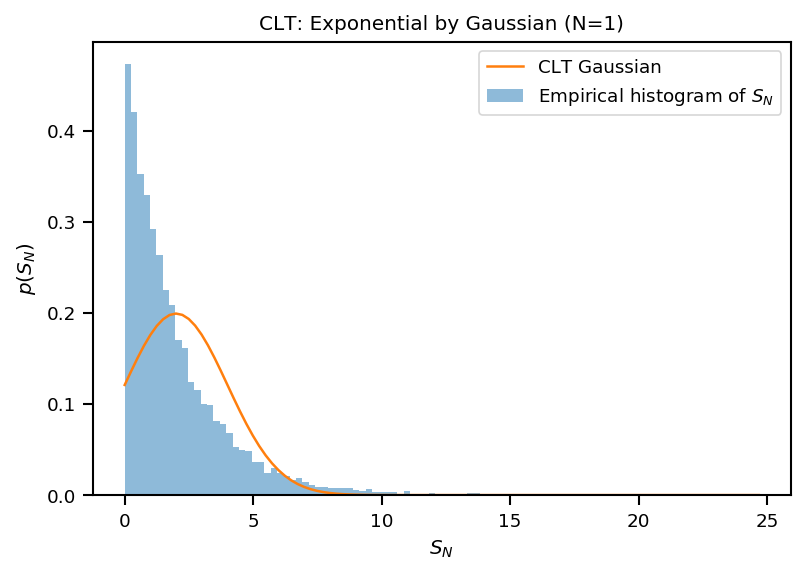

In [2]:
import scipy.stats as st

r = 0.5
N = 1   # How many iid variables are we going to sum
M = 10000 # How many times do you want to sample
# The random variable to sample from
X = st.expon(scale=1.0 / r)  # THIS IS THE ONLY LINE YOU NEED TO CHANGE TO TRY OUT DIFFERENT RVs
# The mean of the random variable
mu = X.expect()
# The variance of the random variable
sigma2 = X.var()
# The CLT standard deivation:
sigma_CLT = np.sqrt(sigma2 / N)

# Sample from X, N x M times.
x_samples = X.rvs(size=(N, M))
# Think of each column of x_samples as a sample from X1, X2, ..., XN.
# Take the average of each column:
SN = np.mean(x_samples, axis=0)

# Now you have M samples of SN
# Let's do their histogram
fig, ax = plt.subplots(dpi=150)
ax.hist(SN, bins=100, density=True, alpha=0.5, label='Empirical histogram of $S_N$')
# Let's depict in the same plot the PDF of the CLT Gaussian:
Ss = np.linspace(SN.min(), SN.max(), 100)
ax.plot(Ss, st.norm(loc=mu, scale=sigma_CLT).pdf(Ss), label='CLT Gaussian')
ax.set_xlabel('$S_N$')
ax.set_ylabel('$p(S_N)$')
ax.set_title('CLT: Exponential by Gaussian (N=%d)' % N)
plt.legend(loc='best');

### Questions

+ Start increase $N$ and observe the convergence.
+ This holds for any random variable that satisfies the assumptions of the central limit theorem. Even discrete random variables! Modify the code above to so that $X_i \sim \operatorname{Bernoulli}(\theta)$ for some $\theta$. You may use 